# The Case of the Credit Cards

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical) BALANCE : Balance amount left in their account to make purchases ( BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) PURCHASES : Amount of purchases made from account ONEOFF_PURCHASES : Maximum purchase amount done in one-go INSTALLMENTS_PURCHASES : Amount of purchase done in installment CASH_ADVANCE : Cash in advance given by the user PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) CASHADVANCEFREQUENCY : How frequently the cash in advance being paid CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" PURCHASES_TRX : Numbe of purchase transactions made CREDIT_LIMIT : Limit of Credit Card for user PAYMENTS : Amount of Payment done by user MINIMUM_PAYMENTS : Minimum amount of payments made by user PRCFULLPAYMENT : Percent of full payment paid by user TENURE : Tenure of credit card service for user

In [3]:
#Import the libraries (pandas for file execution, numpy for linear algebra and matplotlib for basic plots)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

# Display Options
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

In [5]:
#Import the data
credit = pd.read_csv(r'D:\Kaggle\Credit Cards\CC_GENERAL.csv')

In [6]:
#Basic data description
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Brief Data Processing

In [9]:
#Check NAs in the dataset
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So apart from 313 nulls in Minimum Payments and 1 null in credit limit, there is no null in the dataset, so thats a great news.

Treat the null values by substituting by Mean values

In [10]:
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].mean(),inplace=True)
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].mean(),inplace=True)

In [11]:
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Lets drop the Customer ID Column as it does not tell any information about the customer or credit card

In [13]:
credit.drop('CUST_ID',axis=1, inplace = True)

In [14]:
credit.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Scaling the data

In [15]:
from scipy.stats import zscore

In [21]:
X = credit.apply(zscore)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# Clustering

Perform K-Means on the dataset

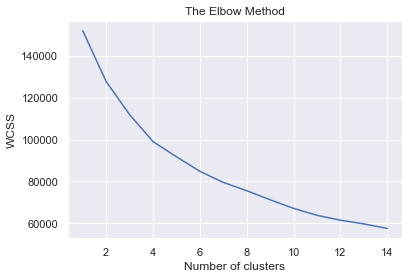

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Fitting KMeans to dataset
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 101)
y_kmeans = kmeans.fit_predict(X)

In [19]:
print(np.unique(y_kmeans))

[0 1 2 3]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


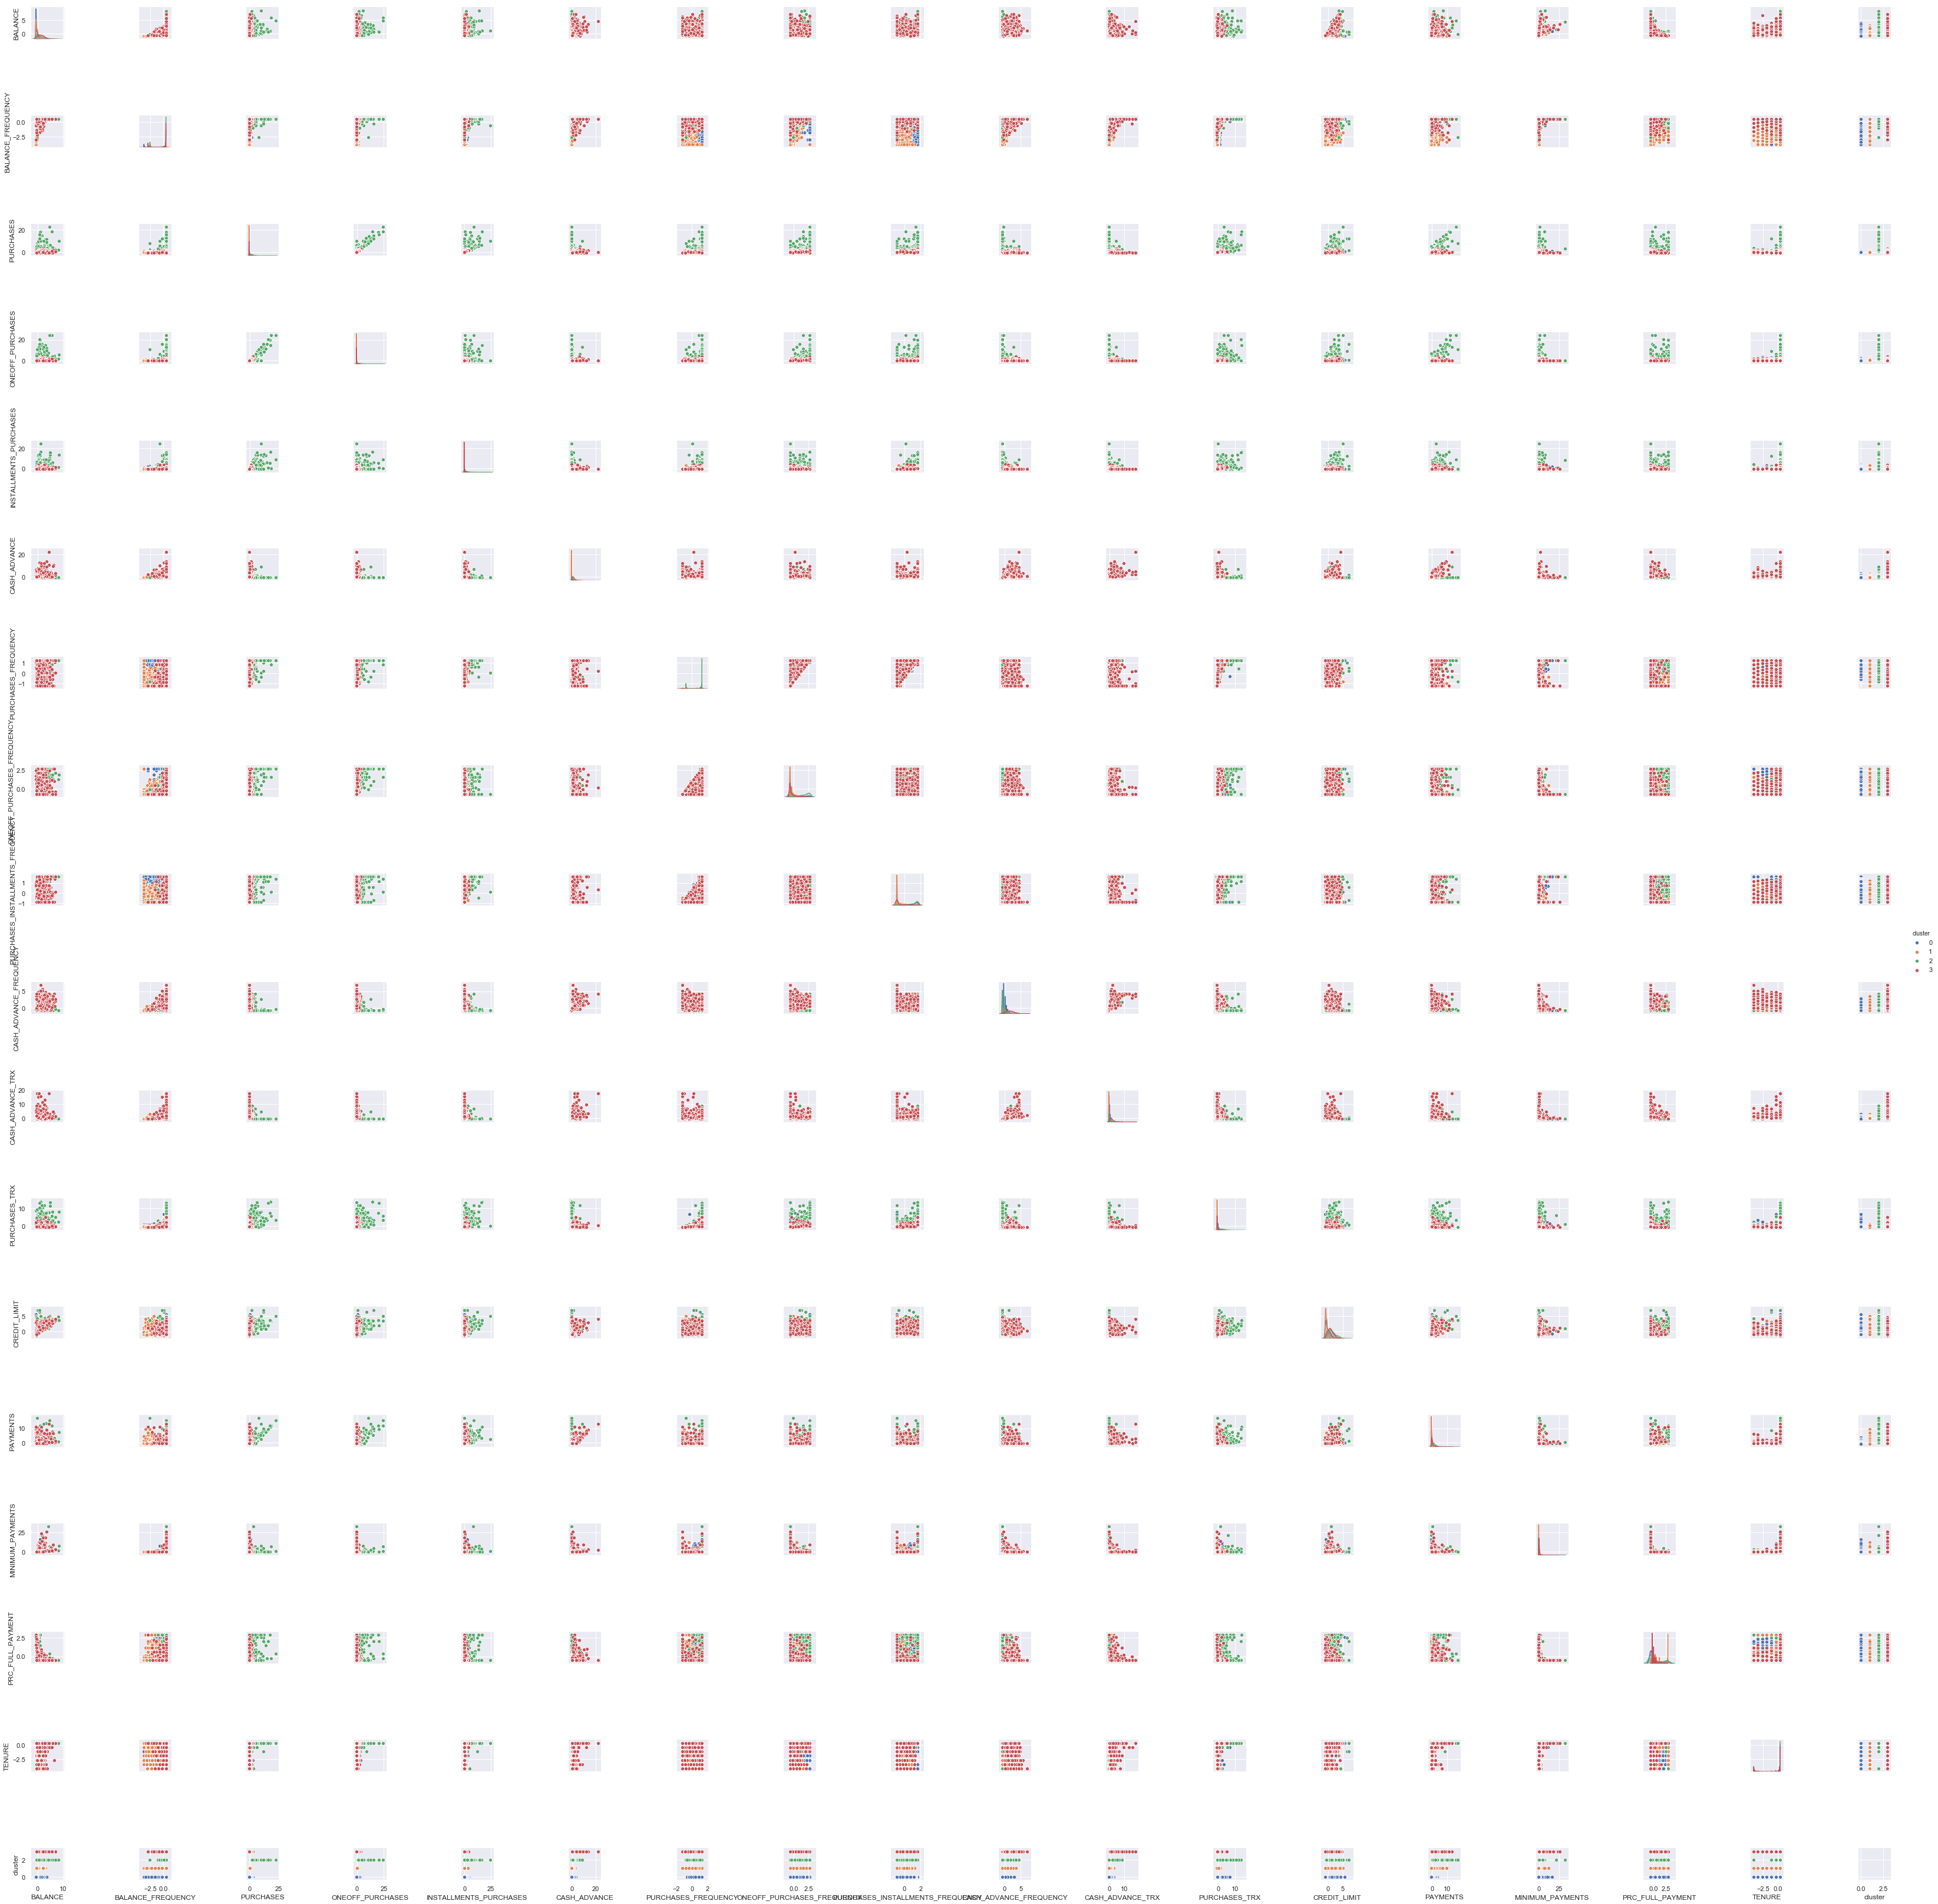

In [27]:
#Visualizing the clusters
import seaborn as sns
X["cluster"] = y_kmeans
cols = list(X.columns)

sns.pairplot( X[ cols ], hue="cluster")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


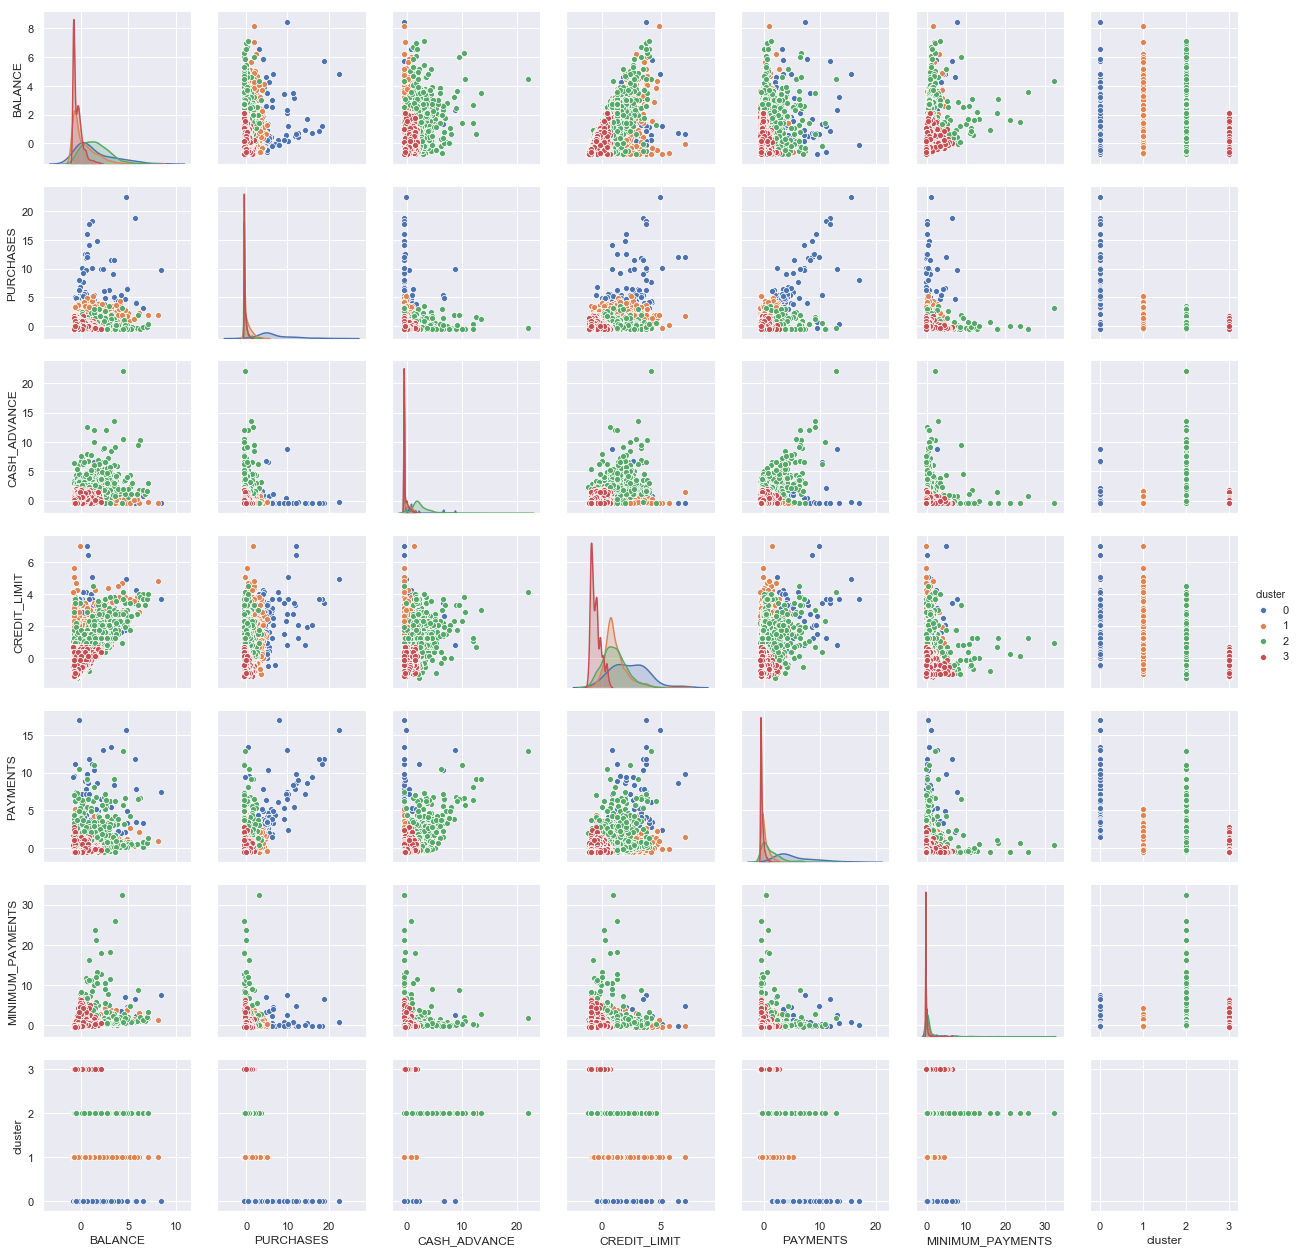

In [56]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=4, init="random", max_iter=300) 
best_vals = X[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

X["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( X[ best_cols ], hue="cluster")

The business objective of the project was to segment the customers in order to define a proper marketing strategy. The following can be some thoughts:

High Balance, High Purchase - These people made expensive purchases but they also had higher balances to support these purchases. They also made large payments, and can be the target for market research. They are represented by blue in the chart.

High Balance, Low Purchase (Higher purchase values)- These are the people who had higher balances but made lower purchases and have medium or high credit limits and took out large cash advances. This segment of people are represented by green.

Medium Balance, Medium Purchase - These customers did not have low or high balances and they also did not make big or small purchases but they did everything in a medium level. They are the second smallest group of customers currently and are represented by green.  

Frugal Customers (low balance, low purchase) - These are the customers that made the smallest purchases and since their credit limit was also low, this means that the customers did not make these purchases frequently. Therefore, it can be assumed that these customers churned out, and marketing strategies can be devised to target these customers. They are the smallest group and are represented by red in the chart.

So a marketing strategy that looked at the four groups can be highly effective to solve the problem.

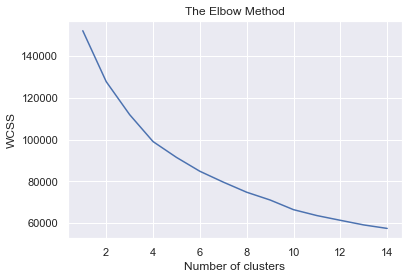

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(credit_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
kmean= KMeans(n_clusters = 4, init = 'k-means++', random_state = 101)
kmean.fit(X)
labels=kmean.labels_

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


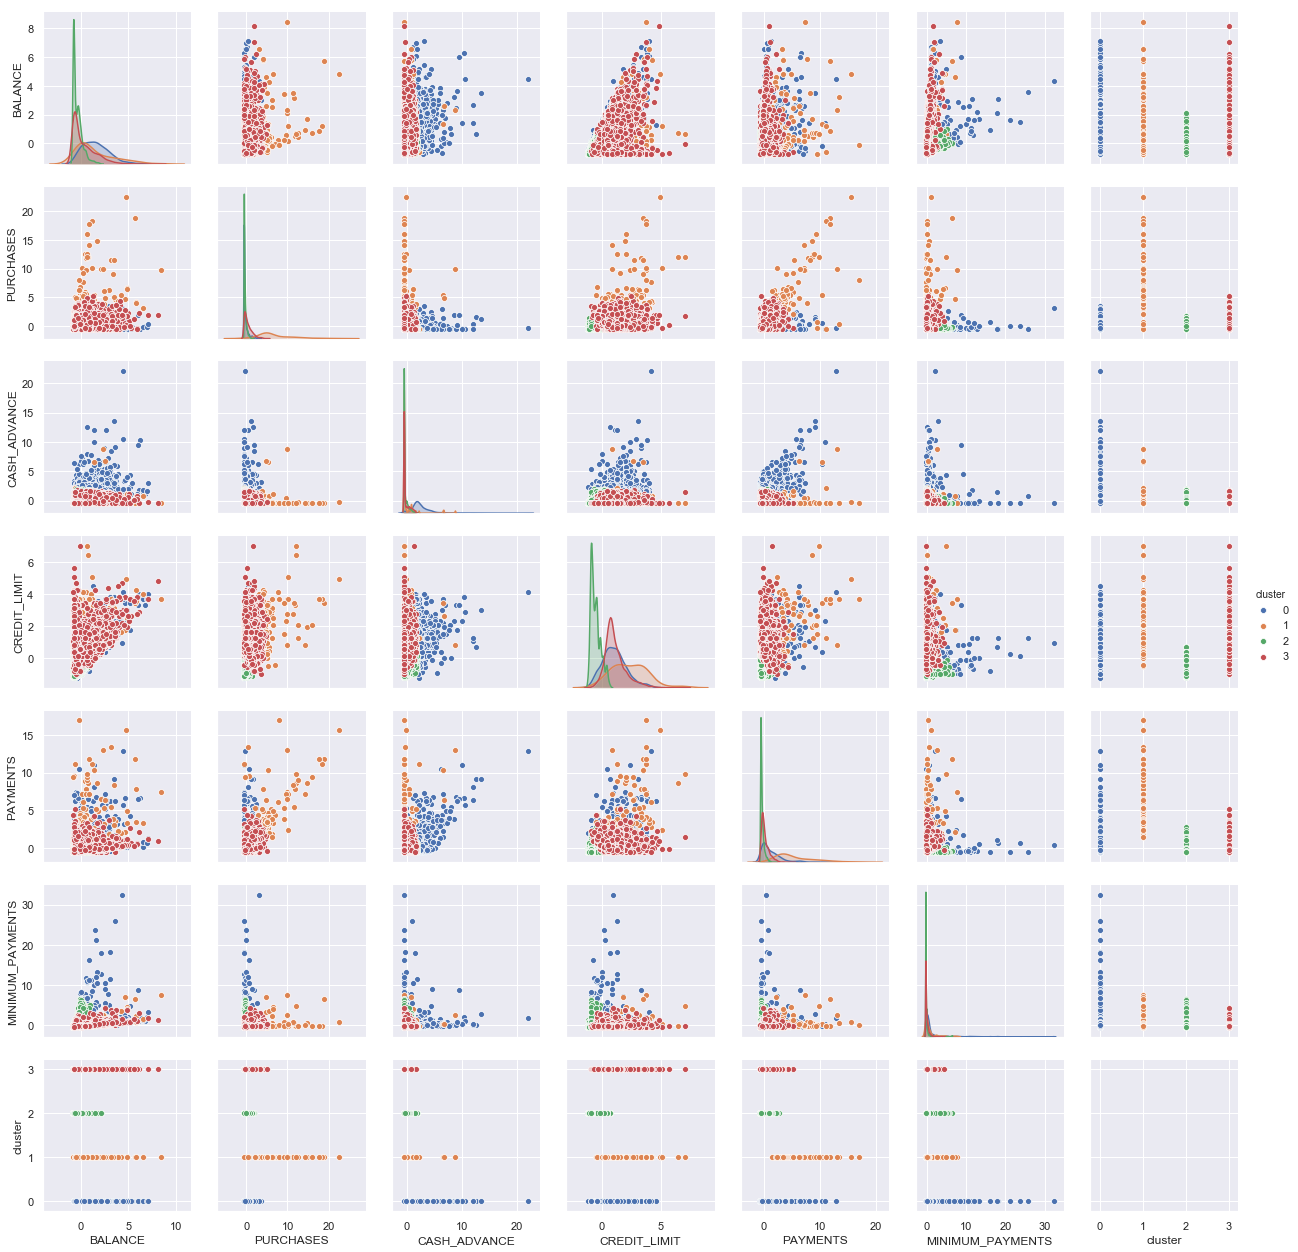

In [49]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=4, max_iter=300) 
best_vals = X[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

X["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( X[ best_cols ], hue="cluster")

The K-Means initialization avoids the random initialization trap and therefore defines the clusters better. A better marketing strategy can thus be devised to look at the clusters. The following can be some inputs for marketing strategies:

High Balance, High Purchase - These people made expensive purchases but they also had higher balances to support these purchases. They also made large payments, and can be the target for market research. They are represented by yellow in the chart.

High Balance, Low Purchase (Higher purchase values)- These are the people who had higher balances but made lower purchases and have medium or high credit limits and took out large cash advances. This segment of people are represented by blue.

Medium Balance, Medium Purchase - These customers did not have low or high balances and they also did not make big or small purchases but they did everything in a medium level. They are the second smallest group of customers currently and are represented by red.  

Frugal Customers (low balance, low purchase) - These are the customers that made the smallest purchases and since their credit limit was also low, this means that the customers did not make these purchases frequently. Therefore, it can be assumed that these customers churned out, and marketing strategies can be devised to target these customers. They are the smallest group and are represented by green in the chart.

So a marketing strategy that looked at the four groups can be highly effective to solve the problem.

In [32]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


# Hierarchical Clustering (Agglomerative Clustering)

Now that we have run the K-Means, and faced the results as above, let's see how the results change when we move to Hierarchical Clustering

In [32]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch


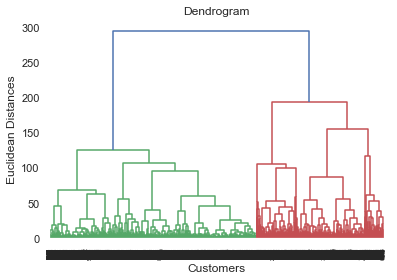

In [36]:
#Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [54]:
#Fitting HC to the Credit Card dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


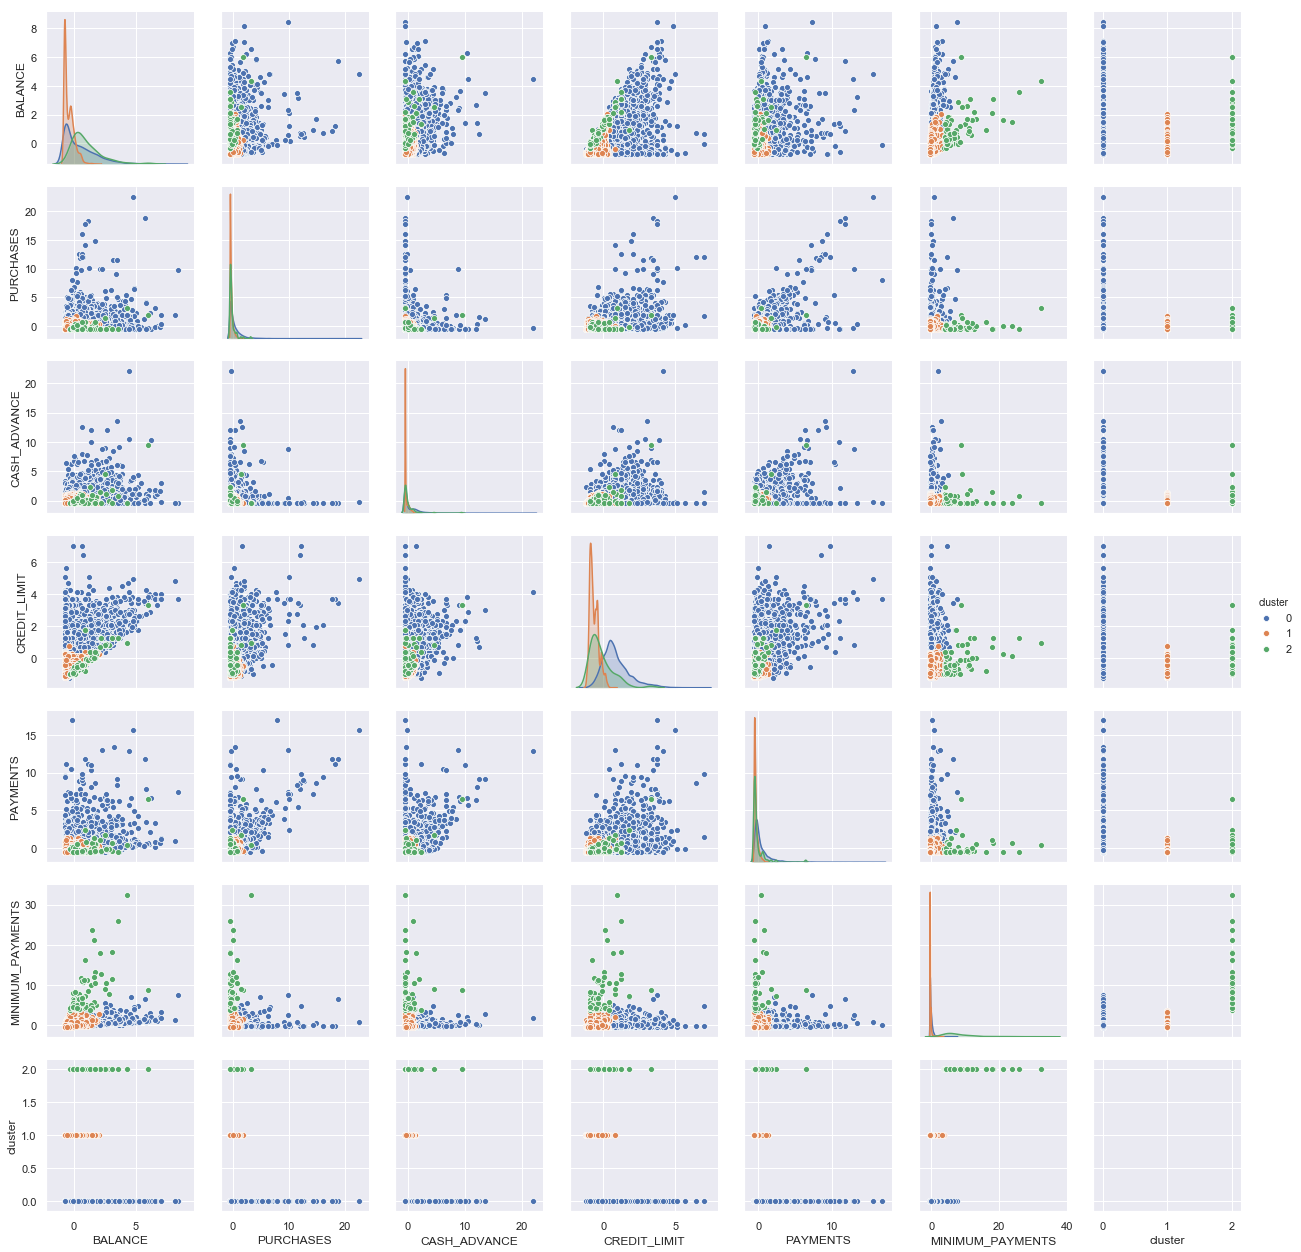

In [55]:
#Visualizing the clusters 
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
best_vals = X[best_cols].iloc[ :, 1:].values
y_hc = hc.fit_predict( best_vals )

X["cluster"] = y_hc
best_cols.append("cluster")
sns.pairplot( X[ best_cols ], hue="cluster")

The Hierarchical Clustering method aims at defining the clusters better by making greedy algorithm. It basically defines suboptimal clusters that are targeted at reducing the variance and thus better separation of the clusters. A sharper better marketing strategy can thus be devised to look at the clusters. The following can be some inputs for marketing strategies:

High Balance, High Purchase - These people made expensive purchases but they also had higher balances to support these purchases. They also made large payments, and can be the target for market research. They are represented by blue in the chart.

Medium Balance, Medium Purchase - These customers did not have low or high balances and they also did not make big or small purchases but they did everything in a medium level. They are the second smallest group of customers currently and are represented by green.

Frugal Customers (low balance, low purchase) - These are the customers that made the smallest purchases and since their credit limit was also low, this means that the customers did not make these purchases frequently. Therefore, it can be assumed that these customers churned out, and marketing strategies can be devised to target these customers. They are the smallest group and are represented by yellow in the chart.

So a marketing strategy that looked at the four groups can be highly effective to solve the problem.

# DBScan Clustering


DBScan Clustering is basically a cluster method that uses Density based methods rather than distance based clustering in K-Means and HC. The full name of DBSCAN is Density Based Spatial Clustering of Applications with Noise

In [52]:
#Fitting DBScan to the Credit Card dataset
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 0.5, min_samples = 15)
y_dbsc = dbsc.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


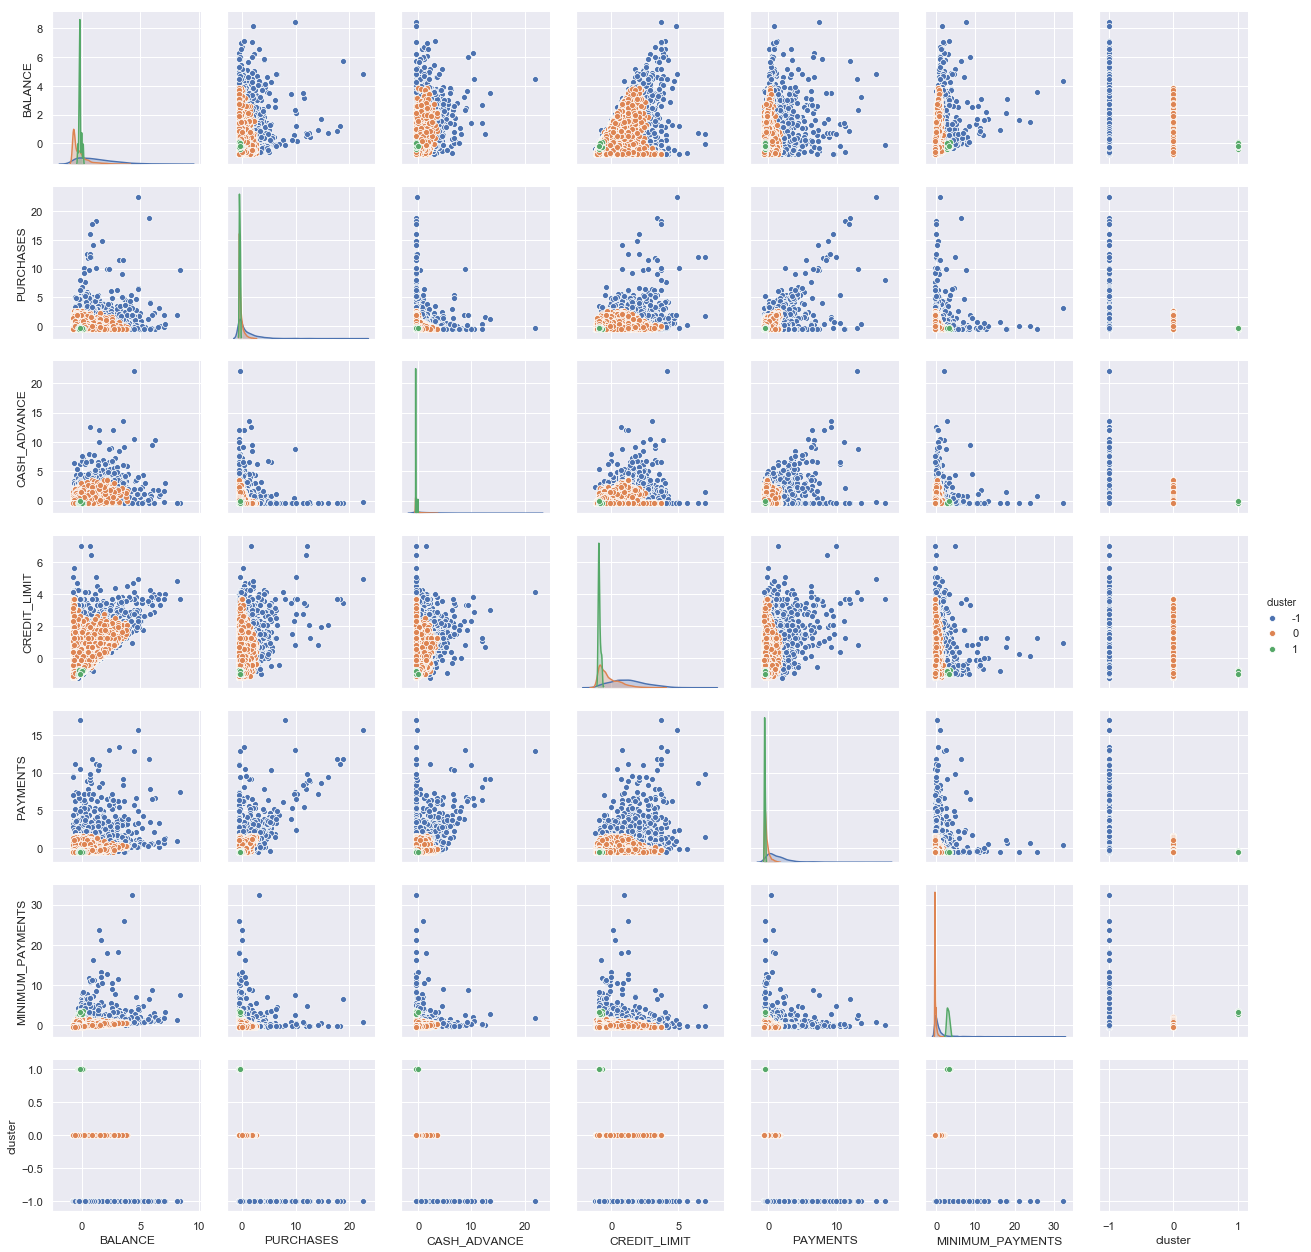

In [53]:
#Visualizing the clusters 
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
dbsc = DBSCAN(eps = 0.5, min_samples = 15)
best_vals = X[best_cols].iloc[ :, 1:].values
y_dbsc = dbsc.fit_predict( best_vals )

X["cluster"] = y_dbsc
best_cols.append("cluster")
sns.pairplot( X[ best_cols ], hue="cluster")